### Import Libraries

In [26]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
import gc
import time
from sklearn.metrics import roc_auc_score
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [28]:
start_time = time.time()
train_cite = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/Selected_Cite_train (1).h5')
end_time = time.time()
print(end_time - start_time)
train_cite.head(100)

0.10841631889343262


,cell_id,ENSG00000114013_CD86,ENSG00000120217_CD274,ENSG00000157873_TNFRSF14,ENSG00000073008_PVR,ENSG00000130202_NECTIN2,ENSG00000196776_CD47,ENSG00000117091_CD48,ENSG00000101017_CD40,ENSG00000102245_CD40LG,...,ENSG00000104921_FCER2,ENSG00000168995_SIGLEC7,ENSG00000204592_HLA-E,ENSG00000085117_CD82,ENSG00000134256_CD101,ENSG00000197405_C5AR1,ENSG00000100031_GGT1,cell_type,donor,day
0,45006fe3e4c8,0.0,0.0,0.000000,0.000000,0.000000,5.177577,4.090185,0.000000,0.0,...,0.0,0.0,0.000000,5.177577,0.0,0.0,0.0,HSC,32606,2
1,d02759a80ba2,0.0,0.0,0.000000,0.000000,0.000000,4.723850,0.000000,0.000000,0.0,...,0.0,0.0,4.039545,0.000000,0.0,0.0,0.0,HSC,32606,2
2,c016c6b0efa5,0.0,0.0,0.000000,0.000000,0.000000,5.439542,0.000000,0.000000,0.0,...,0.0,0.0,3.847321,5.217484,0.0,0.0,0.0,EryP,32606,2
3,ba7f733a4f75,0.0,0.0,0.000000,0.000000,3.436846,4.113780,5.487739,0.000000,0.0,...,0.0,0.0,4.513782,3.436846,0.0,0.0,0.0,NeuP,32606,2
4,fbcf2443ffb2,0.0,0.0,0.000000,0.000000,0.000000,4.196826,0.000000,3.518610,0.0,...,0.0,0.0,3.518610,4.882423,0.0,0.0,0.0,EryP,32606,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,613f1d17569a,0.0,0.0,0.000000,4.437457,0.000000,4.838973,3.756067,3.756067,0.0,...,0.0,0.0,4.437457,0.000000,0.0,0.0,0.0,HSC,32606,2
96,997cb42b095c,0.0,0.0,0.000000,0.000000,0.000000,4.154892,0.000000,0.000000,0.0,...,0.0,0.0,3.477311,3.477311,0.0,0.0,0.0,HSC,32606,2
97,21e74451fc57,0.0,0.0,3.949137,0.000000,0.000000,4.632602,0.000000,0.000000,0.0,...,0.0,0.0,5.034819,4.632602,0.0,0.0,0.0,MkP,32606,2
98,a7de418fbaa3,0.0,0.0,0.000000,0.000000,0.000000,3.536246,3.536246,0.000000,0.0,...,0.0,0.0,4.214725,0.000000,0.0,0.0,0.0,NeuP,32606,2


In [29]:
start_time = time.time()
target_cite = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/Selected_Cite_target.h5')
end_time = time.time()
print(end_time - start_time)
target_cite.head(100)

0.10875439643859863


,cell_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,...,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224,cell_type,donor,day
0,45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,...,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070,HSC,32606,2
1,d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,...,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063,HSC,32606,2
2,c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,...,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600,EryP,32606,2
3,ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,...,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407671,NeuP,32606,2
4,fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,...,-0.841950,-0.869419,0.675092,5.259685,-0.835379,9.631781,1.765445,EryP,32606,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,613f1d17569a,0.794206,-0.199354,0.394503,3.241314,5.260645,9.948053,6.012152,-1.130722,-1.179481,...,-0.392741,-0.260484,0.211767,2.328443,0.300692,1.552404,2.435165,HSC,32606,2
96,997cb42b095c,0.708206,1.224581,0.283149,4.834080,6.004161,5.116378,6.944627,-0.579810,-0.299035,...,-0.728613,-0.319021,0.103488,3.733570,1.415138,3.011945,2.590399,HSC,32606,2
97,21e74451fc57,0.703518,-0.691138,-0.221186,4.191247,2.530828,6.909174,-0.643497,-0.584858,-1.076847,...,-0.618953,-0.322212,0.688929,2.686354,-0.565037,2.354875,1.413066,MkP,32606,2
98,a7de418fbaa3,-0.377428,-0.071481,0.283527,6.219676,6.290244,9.210437,6.139829,-0.378388,0.278112,...,0.670538,-0.191711,0.338978,3.172512,1.079168,1.736706,0.593801,NeuP,32606,2


<Axes: >

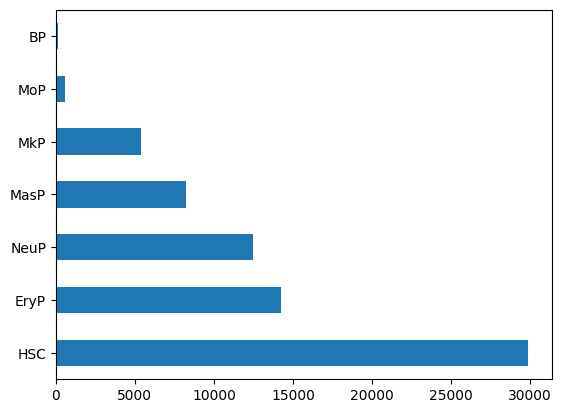

In [30]:
train_cite["cell_type"].value_counts().plot(kind="barh")

## Preparing the Dataset

In [31]:
cell_types = ['BP', 'EryP', 'HSC', 'MasP', 'MkP', 'MoP', 'NeuP']

In [32]:
count = 0
mRNA_c1 = dict()
protein_c1 = dict()
for mRNA, protein in zip(train_cite.columns[1:-3],target_cite.columns[1:-3]):
    fig, ax = plt.subplots()
    count+=1
    for celltype in cell_types:
        x=train_cite.query("`cell_type`== @ celltype")[mRNA]
        y=target_cite.query("`cell_type`== @ celltype")[protein]
        x,y=x[x>0],y[x>0]
        if mRNA not in mRNA_c1:
          mRNA_c1[mRNA] = {celltype: x}
          protein_c1[mRNA] = {celltype: y}
        mRNA_c1[mRNA].update({celltype: x})
        protein_c1[mRNA].update({celltype: y})
        ax.scatter(x,y,s=10,label=celltype)
        ax.set_xlabel(mRNA)
        ax.set_ylabel(protein)
        ax.legend()
    plt.show()
print(count)

Output hidden; open in https://colab.research.google.com to view.

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

def gauss1d(mu, sigma, x_vals):
    y = norm.pdf(x_vals, mu, sigma)
    return y

x_vals = np.linspace(2, 7, 100)
num_cols = 3
num_rows = (len(train_cite.columns[1:-3]) + num_cols - 1) // num_cols
plt.figure(figsize=(15, 5 * num_rows))

for idx, col in enumerate(train_cite.columns[1:-3], start=1):
    plt.subplot(num_rows, num_cols, idx)

    for celltype in cell_types:
        MU = np.mean(mRNA_c1[col][celltype])
        SIGMA = np.std(mRNA_c1[col][celltype])
        y = gauss1d(MU, SIGMA, x_vals)
        plt.plot(x_vals, y, label=celltype)

    plt.xlabel('mRNA')
    plt.ylabel('PDF')
    plt.title('1D Gaussian Distribution (Prior): {0}'.format(col))
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [34]:
def gaussian_process(X, y, col="", ct=""):
    kernel = ConstantKernel() * RBF() + WhiteKernel()
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.2, normalize_y=False)
    gp.fit(X, y)

    x_pred = np.linspace(2, 7, 1000)[:, np.newaxis]
    y_pred, sigma = gp.predict(x_pred, return_std=True)

    plt.plot(x_pred, y_pred, label='Prediction')
    plt.fill_between(x_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, color='#D9F5FF', alpha=1)
    plt.axhline(y=y.mean(), color="red", label="Protein's mean")
    plt.scatter(X, y, label='Observations')
    plt.xlabel("mRNA")
    plt.ylabel("protein")
    plt.title('GPR {0}: {1}'.format(col, ct))
    plt.legend()
    return y_pred

In [35]:
len(train_cite.columns)

112

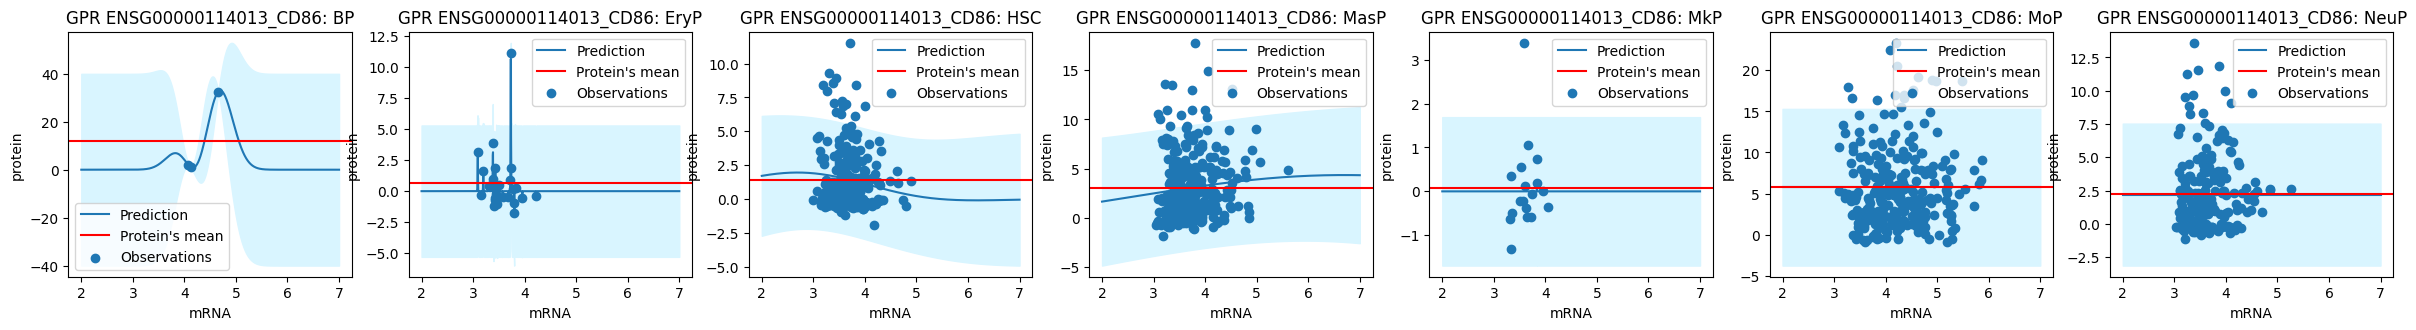

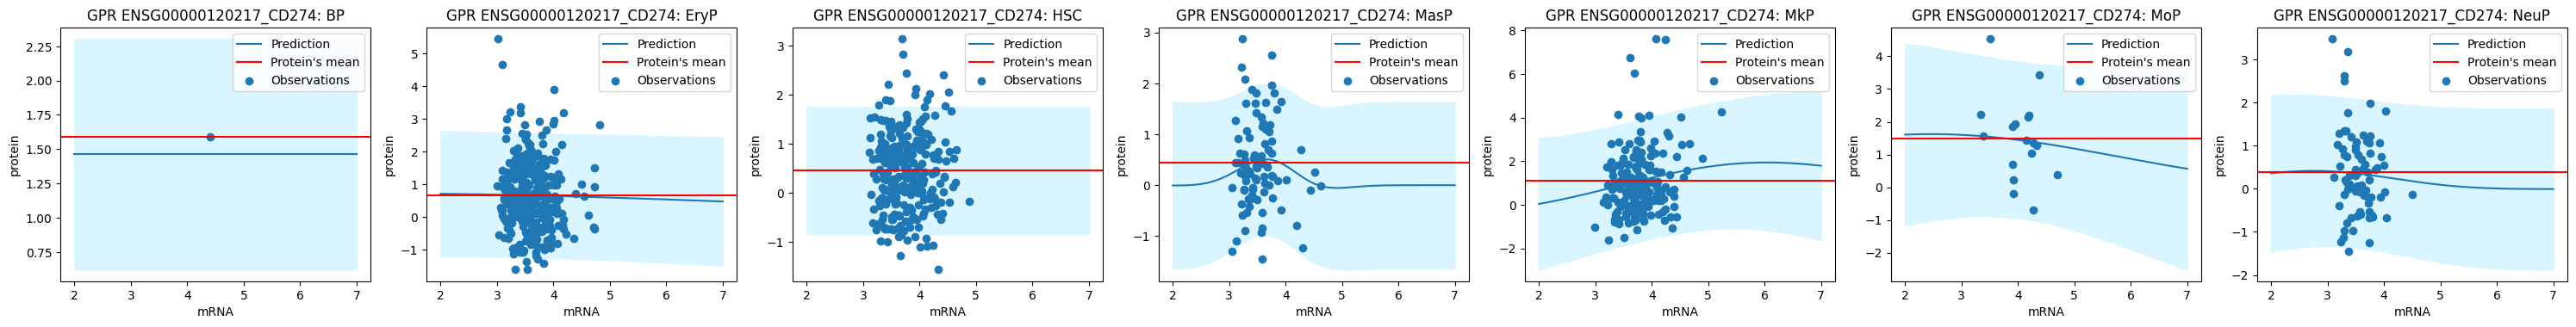

27.850276708602905


In [36]:
import time
num_plots = 7
num_rows = len(train_cite.columns[1:3])
num_cols = 7
y_pred = dict()
start=time.time()
for col_idx, col in enumerate(train_cite.columns[1:3], start=1):
    plt.figure(figsize=(30, 7))
    for plot_idx, celltype in enumerate(cell_types, start=1):
        plt.subplot(num_rows, num_cols, plot_idx + (col_idx - 1) * num_plots)
        x = np.array(mRNA_c1[col][celltype])
        X = x.reshape((len(mRNA_c1[col][celltype]), 1))
        y = np.array(protein_c1[col][celltype])
        if col not in y_pred:
            y_pred[col] = {celltype: gaussian_process(X, y, col, celltype)}
        else:
            y_pred[col].update({celltype: gaussian_process(X, y, col, celltype)})

plt.tight_layout()
plt.show()
end_time = time.time()
print(end_time-start)

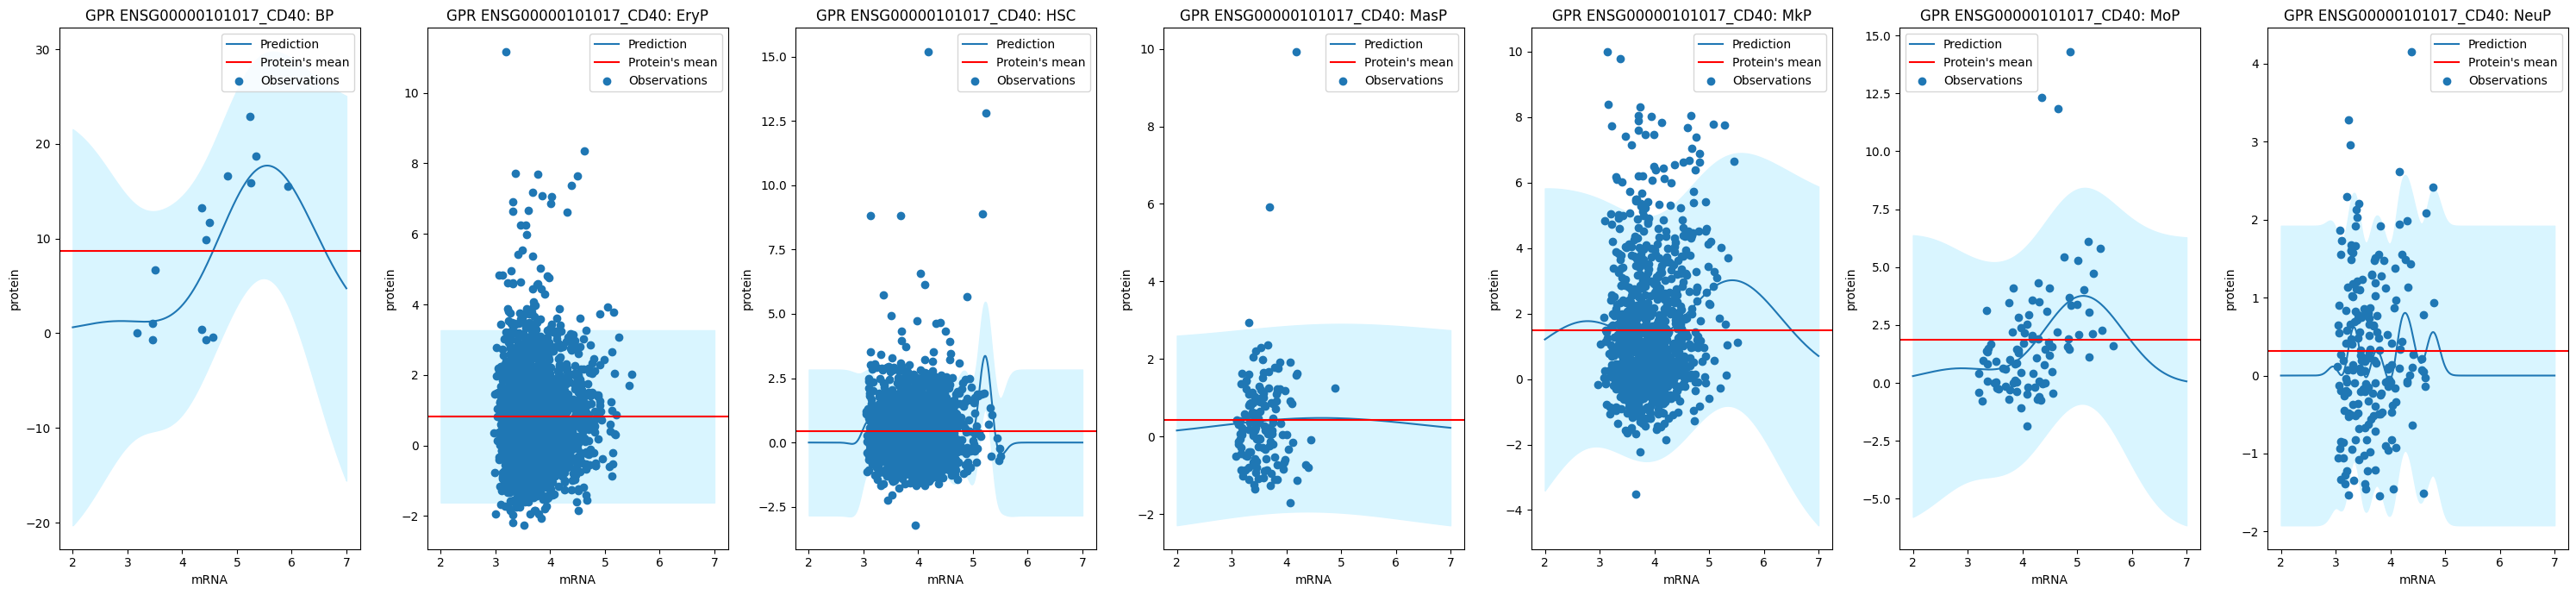

667.0676259994507


In [37]:
import time
num_plots = 7
num_rows = len(train_cite.columns[8:9])
num_cols = 7
y_pred = dict()
start=time.time()
for col_idx, col in enumerate(train_cite.columns[8:9], start=1):
    plt.figure(figsize=(30, 7))
    for plot_idx, celltype in enumerate(cell_types, start=1):
        plt.subplot(num_rows, num_cols, plot_idx + (col_idx - 1) * num_plots)
        x = np.array(mRNA_c1[col][celltype])
        X = x.reshape((len(mRNA_c1[col][celltype]), 1))
        y = np.array(protein_c1[col][celltype])
        if col not in y_pred:
            y_pred[col] = {celltype: gaussian_process(X, y, col, celltype)}
        else:
            y_pred[col].update({celltype: gaussian_process(X, y, col, celltype)})

plt.tight_layout()
plt.show()
end_time = time.time()
print(end_time-start)

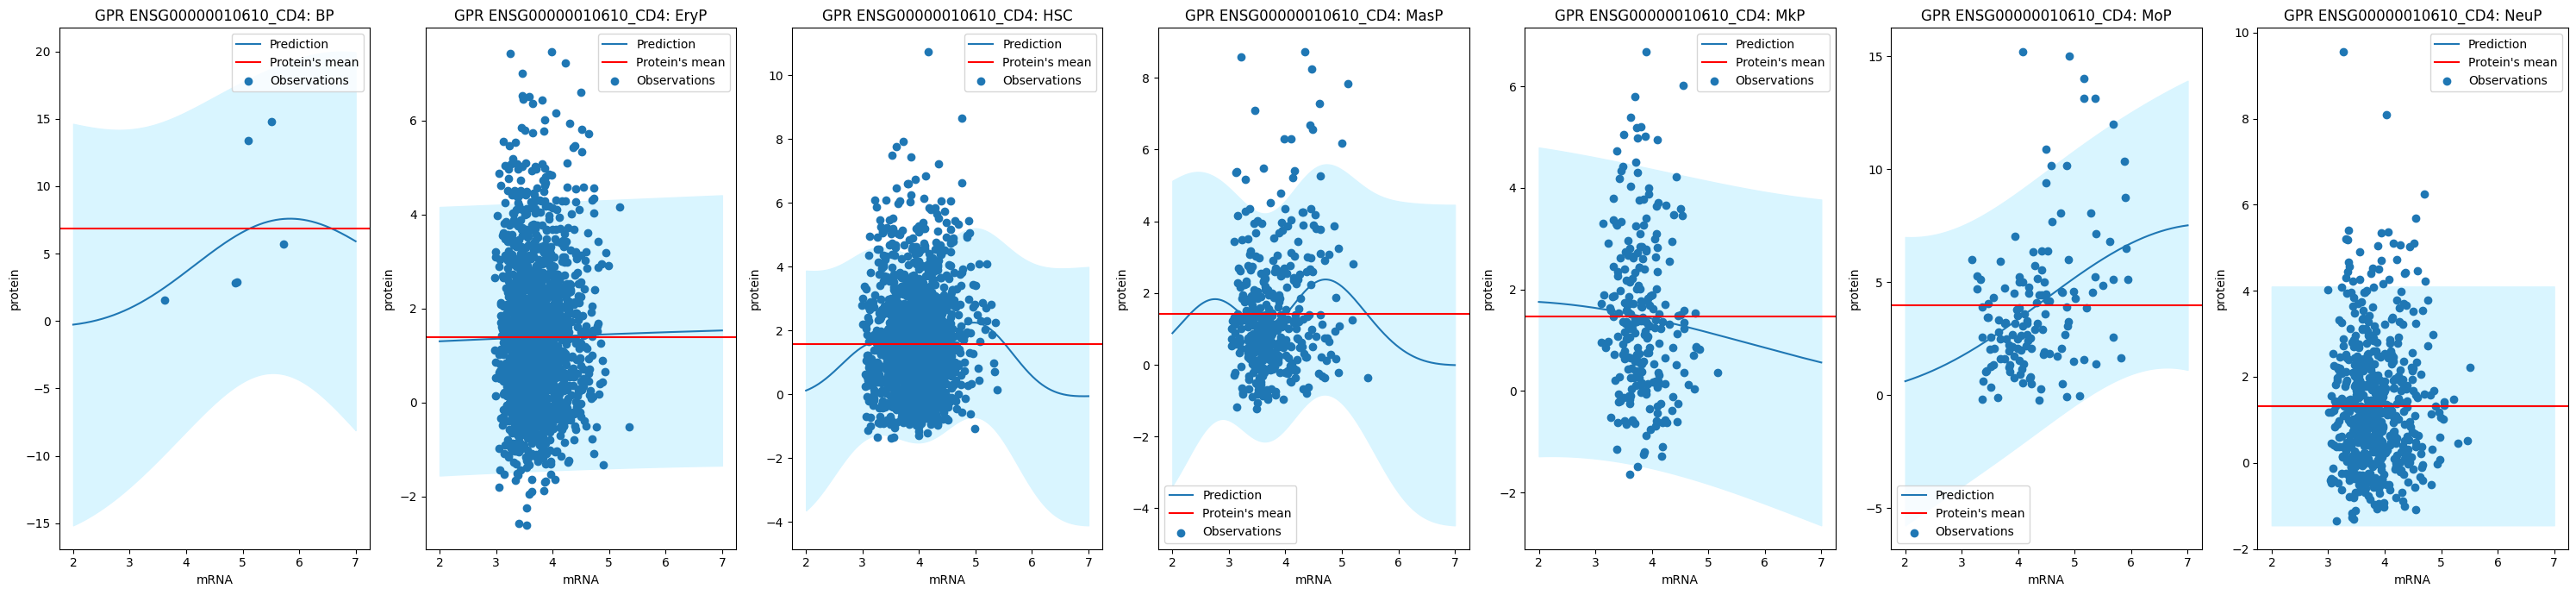

233.4148383140564


In [39]:
import time
num_plots = 7
num_rows = len(train_cite.columns[21:22])
num_cols = 7
y_pred = dict()
start=time.time()
for col_idx, col in enumerate(train_cite.columns[21:22], start=1):
    plt.figure(figsize=(30, 7))
    for plot_idx, celltype in enumerate(cell_types, start=1):
        plt.subplot(num_rows, num_cols, plot_idx + (col_idx - 1) * num_plots)
        x = np.array(mRNA_c1[col][celltype])
        X = x.reshape((len(mRNA_c1[col][celltype]), 1))
        y = np.array(protein_c1[col][celltype])
        if col not in y_pred:
            y_pred[col] = {celltype: gaussian_process(X, y, col, celltype)}
        else:
            y_pred[col].update({celltype: gaussian_process(X, y, col, celltype)})

plt.tight_layout()
plt.show()
end_time = time.time()
print(end_time-start)

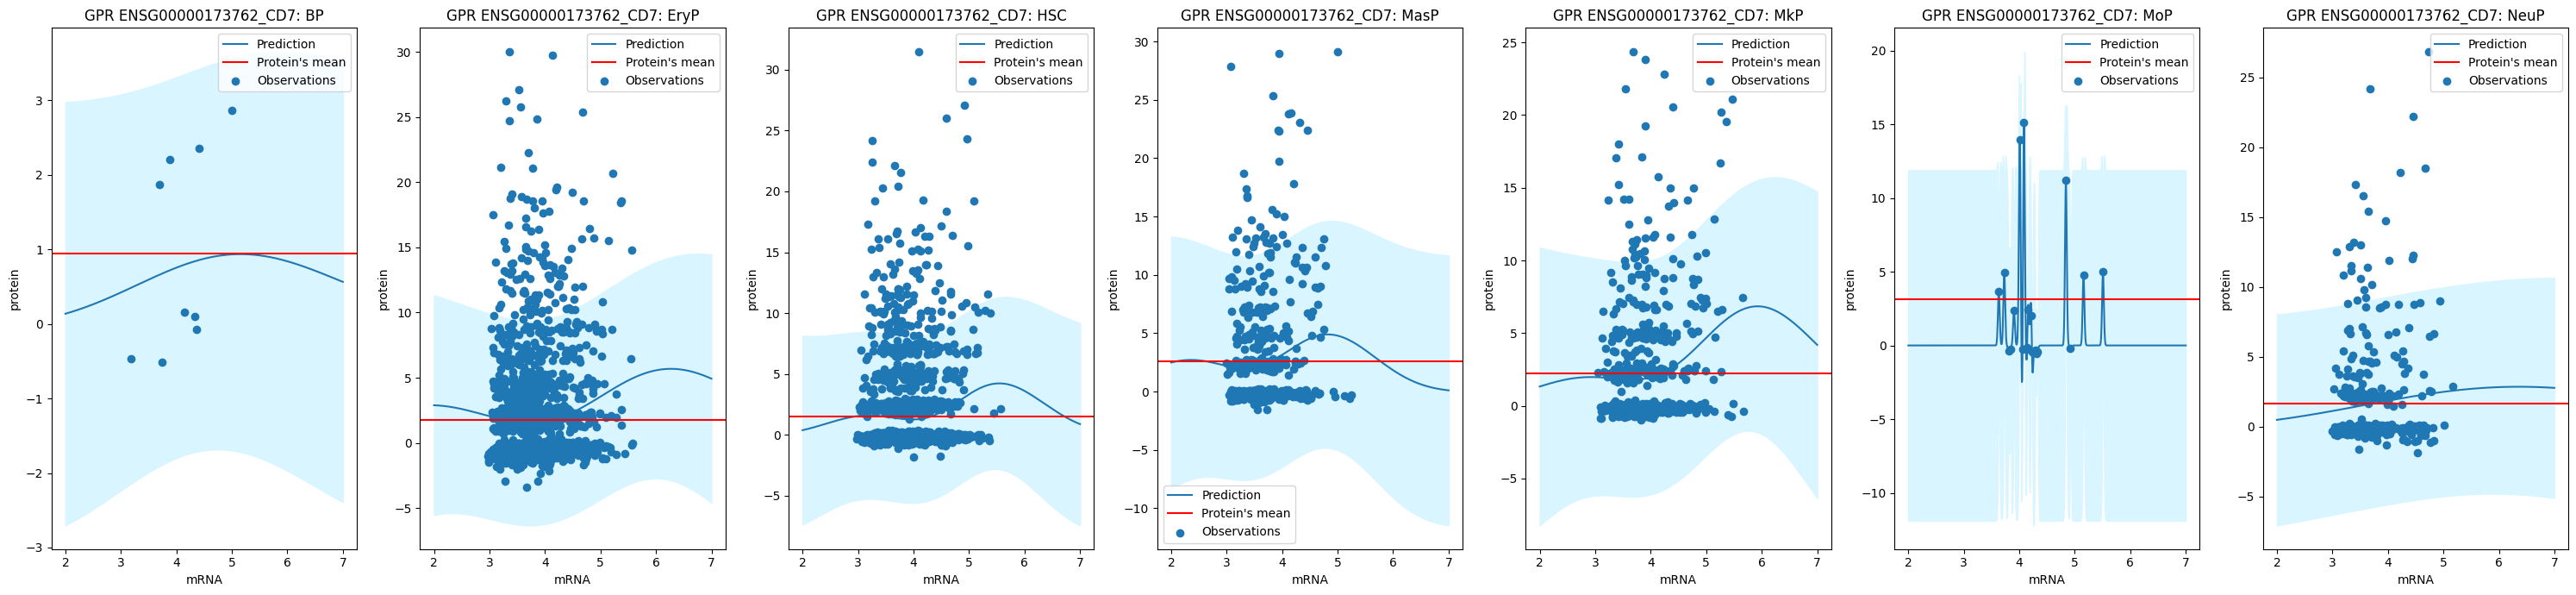

522.1407926082611


In [40]:
import time
num_plots = 7
num_rows = len(train_cite.columns[17:18])
num_cols = 7
y_pred = dict()
start=time.time()
for col_idx, col in enumerate(train_cite.columns[17:18], start=1):
    plt.figure(figsize=(30, 7))
    for plot_idx, celltype in enumerate(cell_types, start=1):
        plt.subplot(num_rows, num_cols, plot_idx + (col_idx - 1) * num_plots)
        x = np.array(mRNA_c1[col][celltype])
        X = x.reshape((len(mRNA_c1[col][celltype]), 1))
        y = np.array(protein_c1[col][celltype])
        if col not in y_pred:
            y_pred[col] = {celltype: gaussian_process(X, y, col, celltype)}
        else:
            y_pred[col].update({celltype: gaussian_process(X, y, col, celltype)})

plt.tight_layout()
plt.show()
end_time = time.time()
print(end_time-start)